Getting all packages needed

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [2]:
file_name='C:\\Users\\ADMIN\\Downloads\\KPMG_VI_New_raw_data_update_final.xlsx'
print(pd.ExcelFile(file_name).sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress', 'Sheet1']


In [3]:
data_demo = pd.read_excel(file_name, sheet_name='CustomerDemographic', index_col=0)
data_demo.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,68.169821,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,40.972561,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,67.895848,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,60.188999,NaN,IT,Mass Customer,N,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,44.569821,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [4]:
def check_NA():
    ret = []
    temp = list(data_demo)
    for each in temp:
        ret.append(data_demo[each].isna().sum())
    return ret

NaNlist = check_NA()
print(NaNlist, len(NaNlist))
# need to check columns
check = []
k     = -1
for i in NaNlist:
    k += 1
    if i > 0:
        check.append(k)
def check_unique():
    temp = list(data_demo)
    mydict = {}
    for i in range(3, 13):
        ct = 0
        if NaNlist[i] > 0:
            ct = len(data_demo[temp[i]].unique()) - 1
        else:
            ct = len(data_demo[temp[i]].unique())
        mydict[temp[i]] = (ct, data_demo[temp[i]].unique())
    return mydict

[0, 125, 0, 0, 87, 1, 506, 656, 0, 0, 0, 87] 12


In [5]:
data_demo.shape

(4000, 12)

In [6]:
data_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           4000 non-null   object        
 1   last_name                            3875 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   Age                                  3999 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [7]:
data_demo.loc[data_demo['Age'] < 100, 'Age_category(yrs.)'] = 'Senior Citizen(61-100)'
data_demo.loc[data_demo['Age'] < 60, 'Age_category(yrs.)'] = 'Senior Adult(50-60)'
data_demo.loc[data_demo['Age'] < 49, 'Age_category(yrs.)'] = 'Adult(25-49)'
data_demo.loc[data_demo['Age'] < 24, 'Age_category(yrs.)'] = 'Youth(<24)'

data_demo.head(4)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age_category(yrs.)
customer_id,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,68.169821,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Senior Citizen(61-100)
2,Eli,Bockman,Male,81,1980-12-16,40.972561,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Adult(25-49)
3,Arlin,Dearle,Male,61,1954-01-20,67.895848,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Senior Citizen(61-100)
4,Talbot,NaN,Male,33,1961-10-03,60.188999,NaN,IT,Mass Customer,N,No,7.0,Senior Citizen(61-100)


In [8]:
data_demo=data_demo.dropna(subset = ['Age'],axis=0,how='any')
data_demo['Age'].isna().sum()
data_demo['Age']=data_demo['Age'].astype('int')
data_demo.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age_category(yrs.)
customer_id,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,68,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Senior Citizen(61-100)
2,Eli,Bockman,Male,81,1980-12-16,40,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Adult(25-49)
3,Arlin,Dearle,Male,61,1954-01-20,67,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Senior Citizen(61-100)
4,Talbot,NaN,Male,33,1961-10-03,60,NaN,IT,Mass Customer,N,No,7.0,Senior Citizen(61-100)
5,Sheila-kathryn,Calton,Female,56,1977-05-13,44,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,Adult(25-49)


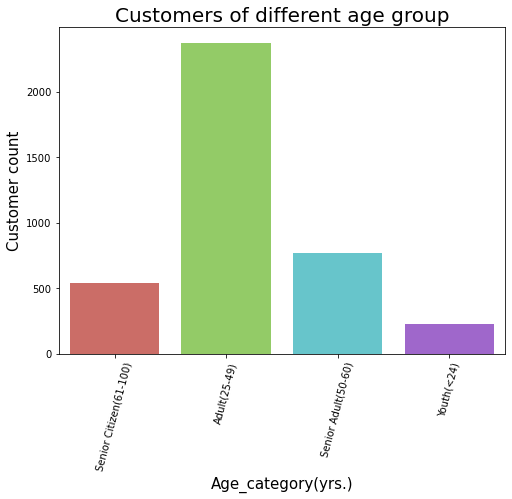

In [9]:
#Customers of different age groups
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='Age_category(yrs.)', data= data_demo, palette='hls')
plt.xticks(rotation =75)
plt.title('Customers of different age group',fontsize=20)
plt.xlabel('Age_category(yrs.)',fontsize=15)
plt.ylabel('Customer count',fontsize=15)
plt.show()

In [10]:
data_add = pd.read_excel(file_name, sheet_name='CustomerAddress', index_col=0)
data_add.head()

,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
customer_id,,,,,,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10,NaN,NaN,NaN,NaN,NSW
2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NSW,NSW,NSW
4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,New South Wales,NSW,QLD
5,17979 Del Mar Point,2448,NSW,Australia,4,NaN,NaN,QLD,QLD,NSW
6,9 Oakridge Court,3216,Victoria,Australia,9,NaN,NaN,VIC,VIC,VIC


In [11]:
state_rename={'New South Wales':'NSW','Victoria':'VIC'}
data_add['state']=data_add['state'].replace(state_rename)

In [12]:
data_add.drop(['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1,inplace=True)
data_add.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


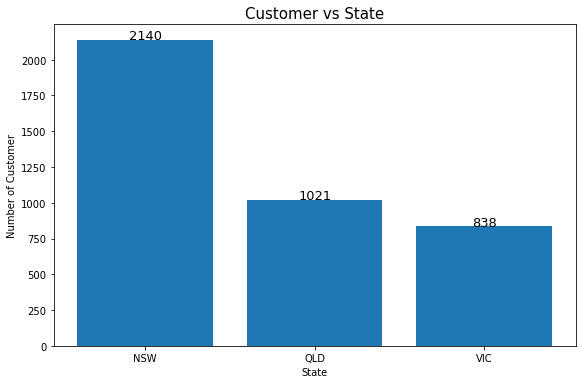

In [13]:
# Which state has more bike customers
plt.figure(figsize=(8,5))
plt.bar(data_add.state.unique(), data_add["state"].value_counts())
#So here index will give you x pos and data+1 will provide a little gap in y axis.
for index, data in enumerate(data_add["state"].value_counts()):
    plt.text(x=index , y =data+1, s=data,horizontalalignment='center', fontdict=dict(fontsize=13))
plt.tight_layout()

plt.ylabel('Number of Customer')
plt.xlabel('State')
plt.title("Customer vs State",fontsize=15)
plt.show()

A large number customers who purchased bikes and cycling accessories from Sprocket Central Pty Ltd belongs to "NSW" or New South Wales state category.

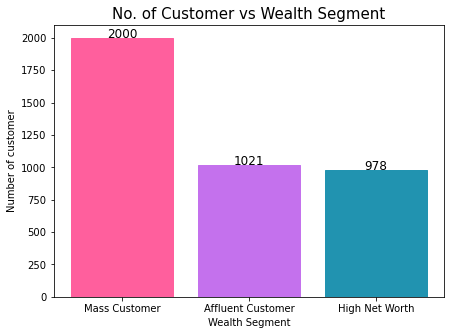

In [14]:
plt.figure(figsize=(7,5))
bar_graph4 = plt.bar(data_demo.wealth_segment.unique(), data_demo["wealth_segment"].value_counts())
for index, data in enumerate(data_demo["wealth_segment"].value_counts()):
    plt.text(x=index , y =data+1, s=data,horizontalalignment='center', fontdict=dict(fontsize=12))
bar_graph4[0].set_color('#FF5F9D')
bar_graph4[1].set_color('#c471ed')
bar_graph4[2].set_color('#2193b0')

plt.ylabel('Number of customer')
plt.xlabel('Wealth Segment')
plt.title("No. of Customer vs Wealth Segment",fontsize=15)
plt.show()

A large number customers who purchased bikes and cycling accessories from Sprocket Central Pty Ltd belongs to "Mass customer" wealth segment category.

In [15]:
data_trans = pd.read_excel(file_name, sheet_name='Transactions', index_col=0)
data_trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
transaction_id,,,,,,,,,,,,,,,,,,,,,
1.0,2.0,2950.0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,37.0,402.0,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,88.0,3135.0,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,78.0,787.0,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data_trans.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20', 'Unnamed: 21',
                'Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 14','Unnamed: 15'],axis=1,inplace=True)
data_trans.head()
data_trans = data_trans[data_trans['Profit'].notna()]

In [17]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 19444 entries, 1.0 to 20000.0
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               19444 non-null  float64       
 1   customer_id              19444 non-null  float64       
 2   transaction_date         19444 non-null  datetime64[ns]
 3   online_order             19444 non-null  float64       
 4   order_status             19444 non-null  object        
 5   brand                    19444 non-null  object        
 6   product_line             19444 non-null  object        
 7   product_class            19444 non-null  object        
 8   product_size             19444 non-null  object        
 9   list_price               19444 non-null  float64       
 10  standard_cost            19444 non-null  float64       
 11  product_first_sold_date  19444 non-null  object        
 12  Profit                   1

In [18]:
import datetime
data_trans['transaction_date']=pd.to_datetime(data_trans['transaction_date'])
data_trans['Transaction_Month']=data_trans['transaction_date'].dt.month_name(locale = 'English')

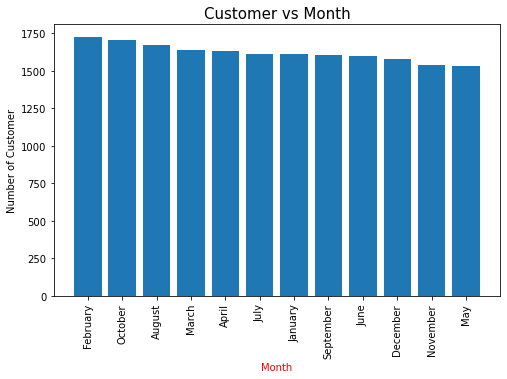

In [19]:
plt.figure(figsize=(8,5))
plt.bar(data_trans.Transaction_Month.unique(), data_trans["Transaction_Month"].value_counts())
plt.xticks(rotation='vertical')
plt.ylabel('Number of Customer')
plt.xlabel('Month', color='r')
plt.title("Customer vs Month",fontsize=15)
plt.show()

In [20]:
new_trans = pd.merge(data_demo, data_trans, on="customer_id", how='inner')

In [21]:
new_trans['customer_id'].value_counts()

2183.0    14
1068.0    14
2476.0    14
637.0     13
2548.0    13
          ..
2807.0     1
1448.0     1
2135.0     1
2749.0     1
1569.0     1
Name: customer_id, Length: 3490, dtype: int64

In [22]:
new_data=pd.merge(new_trans,data_add, on="customer_id",how='inner')

In [23]:
new_data.shape

(19407, 32)

In [24]:
new_data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age_category(yrs.)', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'Profit',
       'Transaction_Month', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

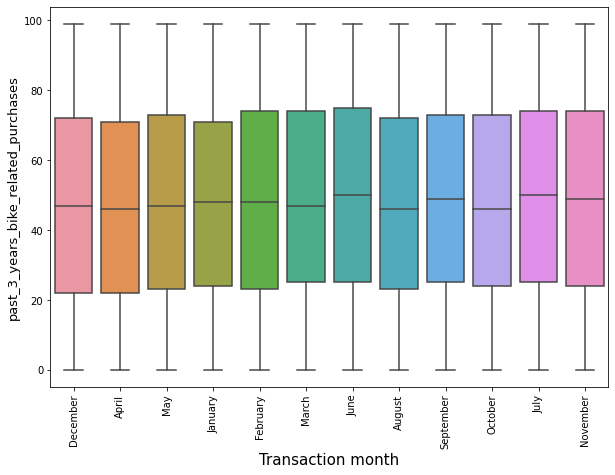

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Transaction_Month', y='past_3_years_bike_related_purchases', data=new_data)
plt.xlabel("Transaction month", fontsize=15)
plt.ylabel('past_3_years_bike_related_purchases',fontsize=13)
plt.xticks(rotation='vertical')
plt.show()

results = data_trans.groupby("product_size").sum()

fig, ax1=plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x=data_trans["product_size"].unique(),y=data_trans["product_size"].value_counts(),color = '#3fada8')
ax2.plot(x=data_trans.product_size.unique(),height=results["standard_cost"],color= 'b-')

ax1.set_xlabel('Product Size')
ax1.set_ylabel('Number of Customer', color ='#3fada8')
ax2.set_ylabel('Standard Cost ($)', color='b')
plt.title("Number of Customer vs Product vs Standard Price ($)")
plt.show()

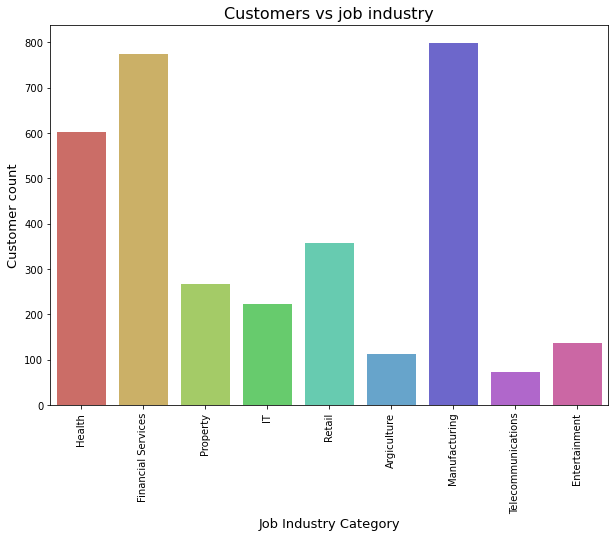

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(x='job_industry_category', data= data_demo, palette='hls')

plt.xticks(rotation ='vertical')
plt.xlabel("Job Industry Category",fontsize=13)
plt.ylabel("Customer count",fontsize=13)
plt.title("Customers vs job industry",fontsize=16)
plt.show()

Most of the customers belong to Manufacturing and Financial services.

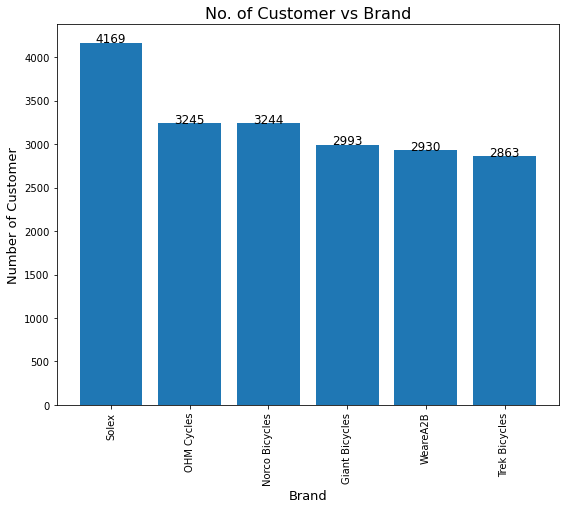

In [44]:
data_trans["Profit"] = pd.to_numeric(data_trans["Profit"])
data_trans["list_price"] = pd.to_numeric(data_trans["list_price"])
data_trans["standard_cost"] = pd.to_numeric(data_trans["standard_cost"])
plt.figure(figsize=(9,7))
plt.bar(data_trans.brand.unique(), data_trans["brand"].value_counts())
for index, data in enumerate(data_trans["brand"].value_counts()):
    plt.text(x=index , y =data+1, s=data,horizontalalignment='center', fontdict=dict(fontsize=12))

plt.xticks(rotation = "vertical", size=10)
plt.ylabel('Number of Customer',fontsize=13)
plt.xlabel('Brand',fontsize=13)
plt.title("No. of Customer vs Brand",fontsize=16)
plt.show()

"Solex" brand bicycles the ones most purchased by the new customers.

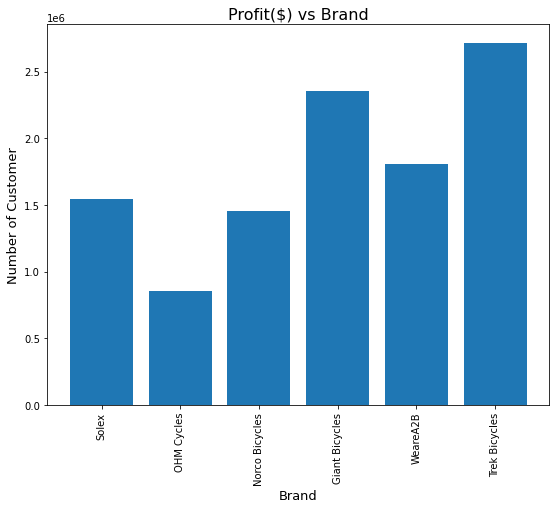

In [28]:
gp = data_trans.groupby("brand").sum()
plt.figure(figsize=(9,7))
plt.bar(data_trans.brand.unique(), gp["Profit"])

plt.xticks(rotation = "vertical", size=10)
plt.ylabel('Number of Customer',fontsize=13)
plt.xlabel('Brand',fontsize=13)
plt.title("Profit($) vs Brand",fontsize=16)
plt.show()

"Trek Bicycles" brand is the most profitable brand.

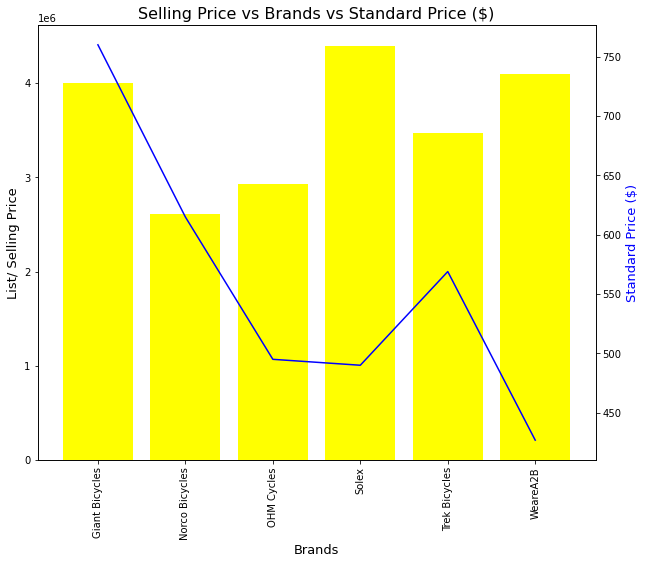

In [29]:
brand_group = data_trans.groupby('brand')
list_price = brand_group.sum()['list_price']

brands = [product for product, df in brand_group]
#To prove that some products are ordered more because of their price.
prices = data_trans.groupby('brand').mean()['standard_cost']

fig, ax1=plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
ax1.bar(brands, list_price, color = 'yellow')
ax2.plot(brands, prices, 'b-')

ax1.set_xlabel('Brands',fontsize=13)
ax1.set_ylabel('List/ Selling Price',fontsize=13)
ax2.set_ylabel('Standard Price ($)', color='b',fontsize=13)
ax1.set_xticklabels(brands, rotation = 90, size=10)
plt.title("Selling Price vs Brands vs Standard Price ($)",fontsize=16)
plt.show()

<Figure size 1080x792 with 0 Axes>

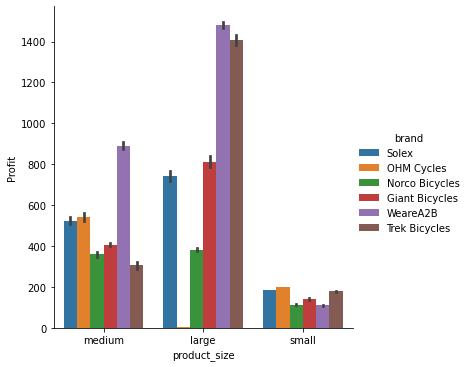

In [31]:
plt.figure(figsize=(15,11))
sns.catplot(x="product_size", y="Profit", hue="brand", kind="bar", data=data_trans)
plt.show()

"Trek bicycles" and "WeareA2B" brands produce good profit in all range of products' size.

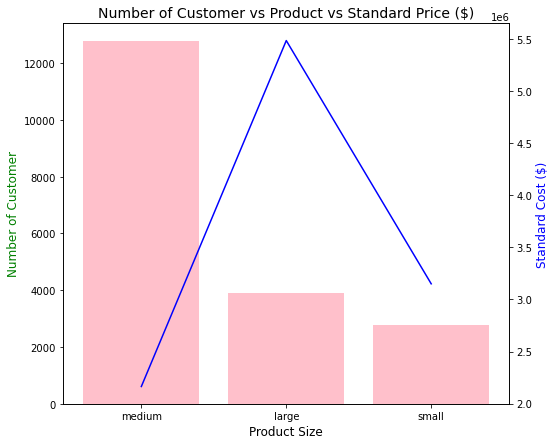

In [38]:
results = data_trans.groupby("product_size").sum()

fig, ax1=plt.subplots(figsize=(8,7))

ax2 = ax1.twinx()
ax1.bar(data_trans.product_size.unique(), data_trans["product_size"].value_counts(), color = 'pink')
ax2.plot(data_trans.product_size.unique(), results["standard_cost"], 'b-')

ax1.set_xlabel('Product Size',fontsize=12)
ax1.set_ylabel('Number of Customer', color ='g',fontsize=12)
ax2.set_ylabel('Standard Cost ($)', color='b',fontsize=12)
plt.title("Number of Customer vs Product vs Standard Price ($)",fontsize=14)
plt.show()

From the graph it can clearly seen that large size products have higher demand. One of the main reason of highest sell of large size product is the lesser cost. According to this low price product attracts highest number of customers.